<a href="https://colab.research.google.com/github/RudrakshSugandhi/VNPD-Vehicle-Number-plate-Detection-/blob/Code-V1/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom', path = '/content/best_model_weights.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
INFO:yolov5:YOLOv5 🚀 2022-10-26 Python-3.7.15 torch-1.12.1+cu113 CPU

YOLOv5 🚀 2022-10-26 Python-3.7.15 torch-1.12.1+cu113 CPU

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 157 layers, 7012822 parameters, 0 gradients
Model summary: 157 layers, 7012822 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [ ]:
img = "/content/Cars2.png"

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
result = model(img)

In [ ]:
result.print()

INFO:yolov5:image 1/1: 400x400 1 licence
Speed: 44.9ms pre-process, 486.6ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
image 1/1: 400x400 1 licence
Speed: 44.9ms pre-process, 486.6ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)


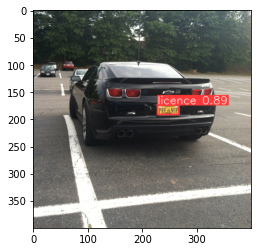

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
bbox_raw= result.xyxy[0][0]
bbox = []

In [ ]:
for bound in bbox_raw:
  bbox.append(int(bound.item()))

bbox= bbox[:4]

In [ ]:
type(crop_image)
invoice_image.crop((0, 0, invoice_image.size[0], 225))


cropped_image = img[Y:Y+H, X:X+W]
print([X,Y,W,H])
plt.imshow(cropped_image)
cv2.imwrite('contour1.png', cropped_image)

NameError: ignored

In [ ]:
crop_image =  result[bbox[0]:bbox[2], bbox[1]:bbox[3]]



TypeError: ignored

In [ ]:
!python3 /content/yolov5/detect.py --source /content/Cars2.png --weights best_model_weights.pt 

detect: weights=['best_model_weights.pt'], source=/content/Cars2.png, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-210-gf9bb984 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/1 /content/Cars2.png: 640x640 1 licence, 487.3ms
Speed: 2.2ms pre-process, 487.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp5


In [ ]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model2 = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

In [ ]:
def ocr_printed_image(src_img):
  pixel_values = model2(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return model2.batch_decode(generated_ids, skip_special_tokens=True)[0]